# What Signal

Signal definition: 

$$
x: \mathbb{R}^m \to \mathbb{R}^n 
$$

in the following we present 
$$
x: \mathbb{R}^1 \to \mathbb{R}^1 
$$

Also we show Differentiate the signal and Integrate the signal over time. 

Sound signal x(t): exp(-t)*sin(10*pi*t)
Derivative of x(t): -exp(-t)*sin(10*pi*t) + 10*pi*exp(-t)*cos(10*pi*t)
Integral of x(t): -sin(10*pi*t)/(exp(t) + 100*pi**2*exp(t)) - 10*pi*cos(10*pi*t)/(exp(t) + 100*pi**2*exp(t))


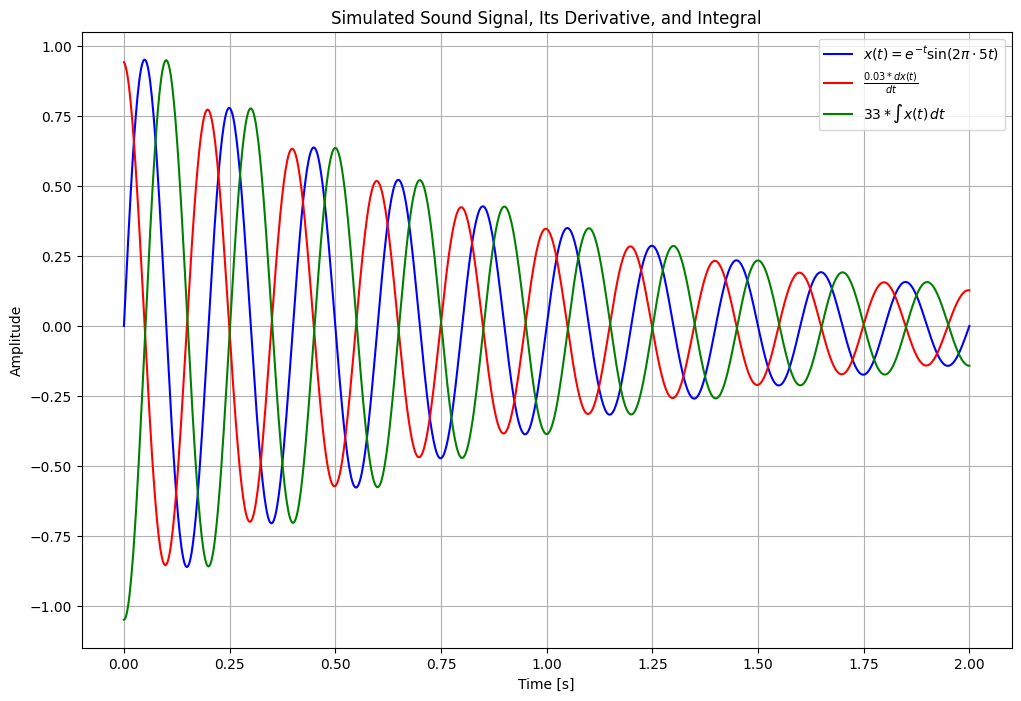

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbolic variable for time
t = sp.symbols('t')

# Define the symbolic sound signal (e.g., a damped exponential signal)
x = sp.exp(-t) * sp.sin(2 * sp.pi * 5 * t)

# Differentiate the signal
x_derivative = sp.diff(x, t)

# Integrate the signal over time
x_integral = sp.integrate(x, t)

# Convert symbolic expressions to numerical functions for plotting
x_func = sp.lambdify(t, x, "numpy")
x_derivative_func = sp.lambdify(t, x_derivative, "numpy")
x_integral_func = sp.lambdify(t, x_integral, "numpy")

# Generate time values for plotting (0 to 2 seconds, sampled at 1000 Hz)
time_values = np.linspace(0, 2, 1000)
signal_values = x_func(time_values)
derivative_values = x_derivative_func(time_values)
integral_values = x_integral_func(time_values)

# Display the symbolic expression of the signal
print("Sound signal x(t):", x)

# Differentiate the signal
print("Derivative of x(t):", x_derivative)

# Integrate the signal over time
print("Integral of x(t):", x_integral)


# Plot the original signal, its derivative, and its integral
plt.figure(figsize=(12, 8))

# Plot the original signal
plt.plot(time_values, signal_values, label=r'$x(t) = e^{-t} \sin(2\pi \cdot 5t)$', color='blue')

# Plot the derivative of the signal
plt.plot(time_values, 0.03*derivative_values, label=r"$\frac{0.03*dx(t)}{dt}$", color='red')

# Plot the integral of the signal
plt.plot(time_values, 33*integral_values, label=r"$33*\int x(t) \, dt$", color='green')

# Add title and labels
plt.title("Simulated Sound Signal, Its Derivative, and Integral")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


## Miniproject: Read speech and manipulate it 

## Image Gray value Signal 

$$
x: \mathbb{R}^2 \to \mathbb{R}^1 
$$


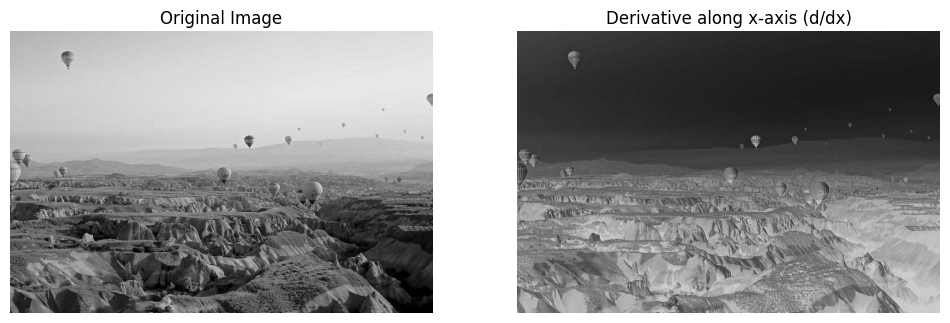

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.ndimage import convolve
from skimage.color import rgb2gray


# Simple derivative kernel for the x-axis (central difference)
#dx_kernel = np.array([[-1, 0, 1]]).reshape(1, 3)
dx_kernel = np.array([[-1, 0, 1],[0,0,0],[-1,0,1]])
# Read an image (replace with your image path)
image_gray = plt.imread('6.jpg')  # Replace with your image path
image_gray = rgb2gray(image_gray)
# Apply the kernel to compute the derivative in the x direction
dx_simple = convolve(image_gray.astype(float), dx_kernel)

# Plot the original and derivative images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Derivative along x-axis
plt.subplot(1, 2, 2)
plt.imshow(dx_simple, cmap='gray')
plt.title('Derivative along x-axis (d/dx)')
plt.axis('off')

plt.show()


## Image RGB Signal 

$$
x: \mathbb{R}^2 \to \mathbb{R}^3 
$$


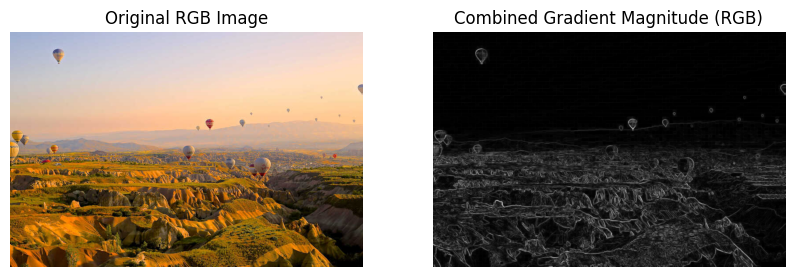

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Define simple Sobel-like kernels for x and y gradients
dx_kernel = np.array([[-1, 0, 1], 
                      [-1, 0, 1], 
                      [-1, 0, 1]])

dy_kernel = np.array([[-1, -1, -1], 
                      [0,  0,  0], 
                      [1,  1,  1]])

# Load the RGB image
image = plt.imread('6.jpg')

# Ensure the image is in RGB format (3 channels)
if len(image.shape) != 3 or image.shape[2] != 3:
    raise ValueError("Image should be in RGB format")

# Apply convolution to each channel for x and y gradients
grad_x = np.zeros_like(image, dtype=float)
grad_y = np.zeros_like(image, dtype=float)

for i in range(3):  # Iterate over RGB channels
    grad_x[..., i] = convolve(image[..., i].astype(float), dx_kernel)
    grad_y[..., i] = convolve(image[..., i].astype(float), dy_kernel)

# Compute gradient magnitude across all channels
grad_magnitude = np.sqrt(np.sum(grad_x**2 + grad_y**2, axis=-1))

# Plotting the results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original RGB Image')
plt.axis('off')

# Gradient image (combined magnitude across RGB channels)
plt.subplot(1, 2, 2)
plt.imshow(grad_magnitude, cmap='gray')
plt.title('Combined Gradient Magnitude (RGB)')
plt.axis('off')

plt.show()


## ECG Signal 

$$
x: \mathbb{R}^{12} \to \mathbb{R}^1 
$$

![ECG_1_Sig](../SignalPython/ECG_1.PNG)

**12-Lead ECG**
**Channels**: 12
**Description**: The standard clinical ECG with 12 different leads, providing a comprehensive view of the heart’s electrical activity from different angles. It includes:
- 3 Bipolar Limb Leads: I, II, III
- 3 Unipolar Limb Leads: aVR, aVL, aVF
- 6 Precordial (Chest) Leads: V1, V2, V3, V4, V5, V6

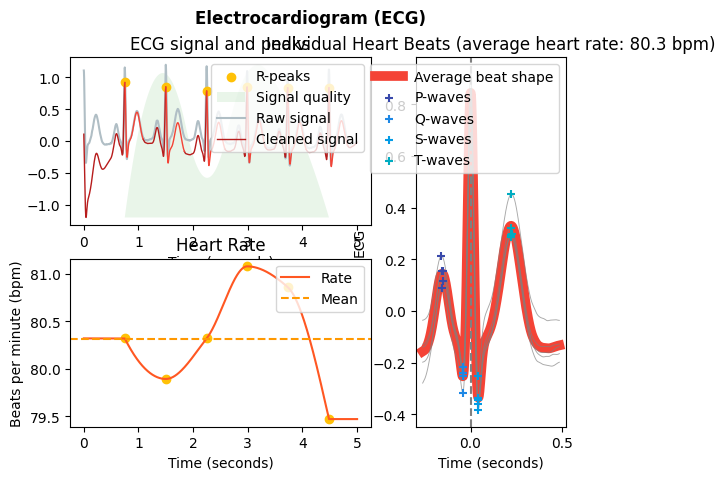

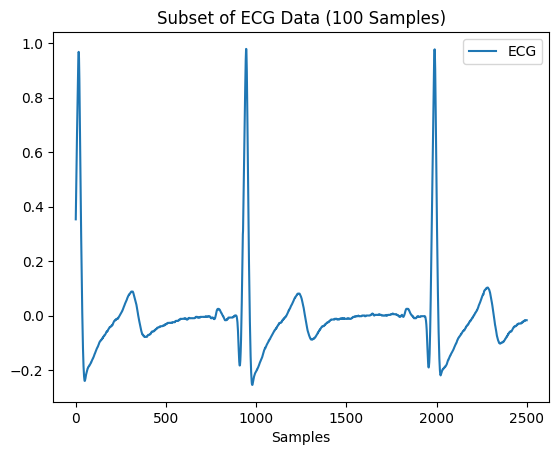

In [38]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Generate a synthetic heart rate signal
ecg=nk.ecg_simulate(duration=5, sampling_rate=1000, heart_rate=80)

signals, info = nk.ecg_process(ecg, sampling_rate=1000)
nk.ecg_plot(signals, info)

ecg = np.array(pd.read_csv("ecg_1000hz.csv"))
subset_ecg = ecg[:2500, 0]  # Select the first 100 samples


ecg_df = pd.DataFrame(subset_ecg, columns=['ECG'])


#nk.signal_plot(ecg)
nk.signal_plot(ecg_df, title="Subset of ECG Data (100 Samples)")
plt.show()


## Discrete Signal

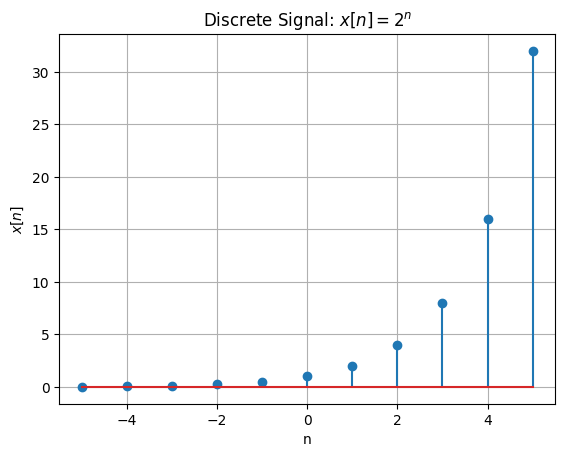

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Discrete signal function: x[n] = 2^n
n_values = np.arange(-5, 6)  # From n = -5 to n = 5
x_values = [2.0**n for n in n_values]

# Plot the discrete signal
plt.stem(n_values, x_values)
plt.title("Discrete Signal: $x[n] = 2^n$")
plt.xlabel("n")
plt.ylabel("$x[n]$")
plt.grid(True)
plt.show()


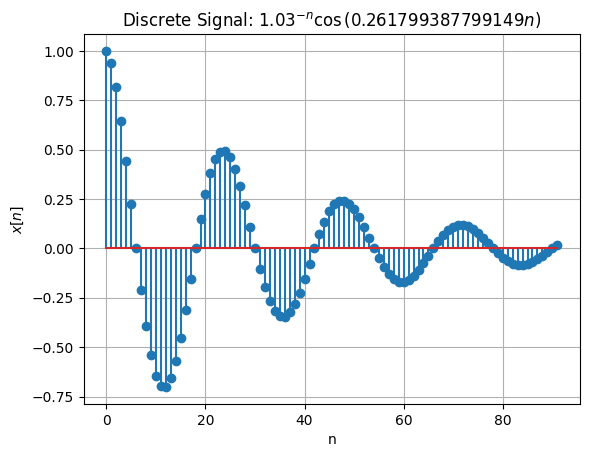

cos(0.261799387799149*n)/1.03**n


In [74]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import cos

# Step 1: Define the discrete variable
n = sp.symbols('n', integer=True)

# Step 2: Define the discrete signal (for example, x[n] = 2^n)
x_n = 1.03**(-n)*cos(np.pi/12*(n-0))

# Step 3: Generate the sequence of values for n (e.g., from -5 to 5)
n_values = np.arange(0, 92)

# Step 4: Convert the symbolic expression to numerical values
# Use SymPy's lambdify to convert the expression to a numeric function
x_n_func = sp.lambdify(n, x_n, 'numpy')

# Step 5: Evaluate the function for the range of n_values
x_values = x_n_func(n_values)

# Step 6: Plot the discrete signal
plt.stem(n_values, x_values)
plt.title(f"Discrete Signal: ${sp.latex(x_n)}$")
plt.xlabel("n")
plt.ylabel("$x[n]$")
plt.grid(True)
plt.show()
print(x_n)